In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import sys

from collections import deque
from env import SimpleAmpEnv
from DQNagent import DQNagent



Bad key text.latex.unicode in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You pr

In [2]:
# Change clab to True if using google colaboratory
clab = False

if clab:
    from tensorflow.keras.utils import plot_model


In [3]:
# Initialize environment
env = SimpleAmpEnv(ideal=False, reward_type="AutoCkt")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Check the Input layer size, and Output layer size
print(f"Input_Layer size: {state_size}")
print(f"Output_Layer size: {action_size}")

Input_Layer size: 3
Output_Layer size: 3


/Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [4]:
agent = DQNagent(state_size, action_size)
agent.main_model.summary()
agent.target_model.summary()
if clab:
    plot_model(agent.main_model, show_shapes=True)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
______________________________________

2022-02-16 13:02:22.650283: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-16 13:02:22.650662: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


In [5]:
scores = []

In [16]:
# Main loop (or Traning Loop for 10 episodes)

num_episodes = 30


for episode in range(num_episodes):

    print(f"Episode {episode+1}(starting epsilon: {agent.epsilon}):")
    done = False
    step = 0 
    score = []
    state = np.reshape(env.reset(), [1, state_size])

    while not done:
        step += 1 
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        agent.append_sample(state, action, reward, next_state, done)
        score.append(reward)

        if len(agent.memory) >= agent.train_start:
            agent.train_model()

        if (step+1) % 10 == 0 :
            print(f"step: {step}, Current: {env.current_id:.4f} action: {action}, epsilon: {agent.epsilon:.4f}")
            agent.update_target_model()

        state = next_state

        if done:
            result = np.average(score) 
            scores.append(result)
        


Episode 1(starting epsilon: 0.09994334856146549):
step: 9, Current: 0.0450 action: 0, epsilon: 0.0999
step: 19, Current: 0.0360 action: 0, epsilon: 0.0999
step: 29, Current: 0.0260 action: 0, epsilon: 0.0999
step: 39, Current: 0.0180 action: 0, epsilon: 0.0999
step: 49, Current: 0.0090 action: 0, epsilon: 0.0999
Episode 2(starting epsilon: 0.09994334856146549):
step: 9, Current: 0.1170 action: 0, epsilon: 0.0999
step: 19, Current: 0.1070 action: 0, epsilon: 0.0999
step: 29, Current: 0.0990 action: 2, epsilon: 0.0999
step: 39, Current: 0.0890 action: 0, epsilon: 0.0999
step: 49, Current: 0.0810 action: 0, epsilon: 0.0999
step: 59, Current: 0.0730 action: 0, epsilon: 0.0999
step: 69, Current: 0.0630 action: 0, epsilon: 0.0999
step: 79, Current: 0.0530 action: 0, epsilon: 0.0999
step: 89, Current: 0.0440 action: 0, epsilon: 0.0999
step: 99, Current: 0.0340 action: 0, epsilon: 0.0999
step: 109, Current: 0.0270 action: 1, epsilon: 0.0999
step: 119, Current: 0.0190 action: 0, epsilon: 0.0999

In [54]:
# Prediction outputs... (even though it is not correct yet)
test_state = np.reshape(env.reset(), [1, state_size])
test_q_values = agent.main_model.predict(test_state)
action_choice = np.argmax(test_q_values)
print(env.current_id)
print(test_q_values)
print(action_choice)

0.14400000000000002
[[0.06013511 0.00921142 0.19199994]]
2


In [24]:
test_states = np.arange(1, 300) * 0.001
test_states[0]
test_gbp = env._circuit_topology(test_states[0])[-1]
test_gbp_target = env.gbp_target
test_input = np.array([test_states[0], test_gbp, test_gbp_target])

In [25]:
test_input_norm = env.normalize_target(test_input)
test_input_norm

array([0.00333333, 0.10101015, 0.5       ], dtype=float32)

In [26]:
test_q_values = agent.main_model.predict(test_input_norm)
# np.argmax(test_q_values)

ValueError: Error when checking input: expected dense_input to have shape (3,) but got array with shape (1,)

In [12]:
test_states = np.arange(1, 300)
input_stack = []
q_stack = []
predictions = []

for i in range(len(test_states)):
    test_gbp = env._circuit_topology(test_states[i]*1e-3)[-1]
    test_gbp_target = env.gbp_target
    test_input = np.array([test_states[i]*1e-3, test_gbp, test_gbp_target])
    input_stack.append(test_input)
    test_input_norm = np.reshape(env.normalize_target(test_input), [1, state_size])
    test_q_values = agent.main_model.predict(test_input_norm)
    q_stack.append(test_q_values)
    print(f"current_id: {test_states[i]*1e-3:.4f}, action_prediction: {np.argmax(test_q_values)}")
    predictions.append(np.argmax(test_q_values))

input_stack = np.array(input_stack)
q_stack = np.array(q_stack)

current_id: 0.0010, action_prediction: 0
current_id: 0.0020, action_prediction: 0
current_id: 0.0030, action_prediction: 0
current_id: 0.0040, action_prediction: 0
current_id: 0.0050, action_prediction: 0
current_id: 0.0060, action_prediction: 0
current_id: 0.0070, action_prediction: 0
current_id: 0.0080, action_prediction: 0
current_id: 0.0090, action_prediction: 0
current_id: 0.0100, action_prediction: 0
current_id: 0.0110, action_prediction: 0
current_id: 0.0120, action_prediction: 0
current_id: 0.0130, action_prediction: 0
current_id: 0.0140, action_prediction: 0
current_id: 0.0150, action_prediction: 0
current_id: 0.0160, action_prediction: 0
current_id: 0.0170, action_prediction: 0
current_id: 0.0180, action_prediction: 0
current_id: 0.0190, action_prediction: 0
current_id: 0.0200, action_prediction: 0
current_id: 0.0210, action_prediction: 0
current_id: 0.0220, action_prediction: 0
current_id: 0.0230, action_prediction: 0
current_id: 0.0240, action_prediction: 0
current_id: 0.02

In [28]:
input_stack

array([[1.00000000e-03, 6.06060909e+10, 3.00000000e+11],
       [2.00000000e-03, 1.11111139e+11, 3.00000000e+11],
       [3.00000000e-03, 1.53846179e+11, 3.00000000e+11],
       [4.00000000e-03, 1.90476214e+11, 3.00000000e+11],
       [5.00000000e-03, 2.22222244e+11, 3.00000000e+11],
       [6.00000000e-03, 2.50000021e+11, 3.00000000e+11],
       [7.00000000e-03, 2.74509824e+11, 3.00000000e+11],
       [8.00000000e-03, 2.96296315e+11, 3.00000000e+11],
       [9.00000000e-03, 3.15789491e+11, 3.00000000e+11],
       [1.00000000e-02, 3.33333350e+11, 3.00000000e+11],
       [1.10000000e-02, 3.49206365e+11, 3.00000000e+11],
       [1.20000000e-02, 3.63636379e+11, 3.00000000e+11],
       [1.30000000e-02, 3.76811609e+11, 3.00000000e+11],
       [1.40000000e-02, 3.88888903e+11, 3.00000000e+11],
       [1.50000000e-02, 4.00000013e+11, 3.00000000e+11],
       [1.60000000e-02, 4.10256423e+11, 3.00000000e+11],
       [1.70000000e-02, 4.19753099e+11, 3.00000000e+11],
       [1.80000000e-02, 4.28571

In [55]:
x = []

for i in range(10):
    x.append(i)
    if i == 9:
        score = np.average(x)

print(score)

4.5


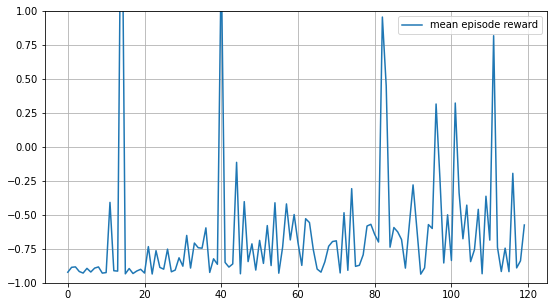

In [23]:
plt.figure(figsize=(9, 5))
plt.plot(scores, label="mean episode reward")
plt.ylim([-1, 1])
plt.legend()
plt.grid()


In [29]:

agent.main_model.save("./trained_model/main_model.h5")

In [26]:
os.mkdir("./trained_model/")